<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here
hi = pd.read_csv('health_insurance.csv')
hi.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

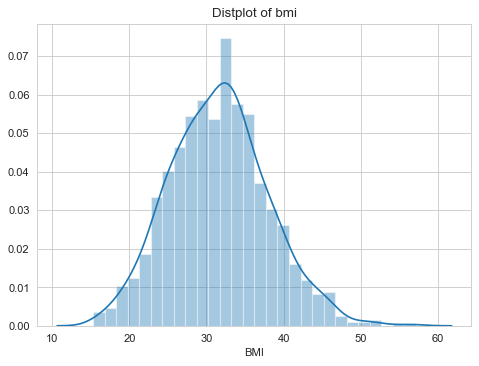

The skew value of BMI is :  0.2496769760401315
Yes, there are extreme values in BMI as the curve shown above has skewed on both the ends


In [4]:
# import your code here
plt.figure(figsize = (7,5),dpi = 80)
sns.distplot(hi['bmi'])
plt.title('Distplot of bmi')
plt.xlabel('BMI')
plt.show()
print('The skew value of BMI is : ',hi['bmi'].skew())
print('Yes, there are extreme values in BMI as the curve shown above has skewed on both the ends')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The skew value of age is :  0.04359793424360781


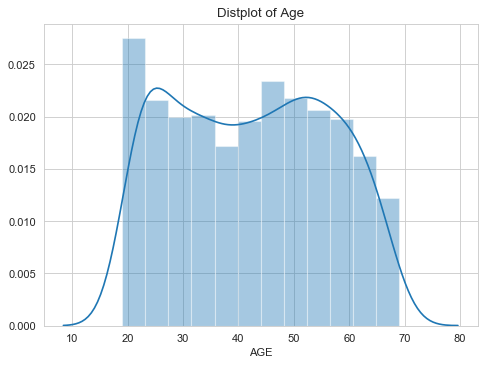

Since the value of the skew is closer to 0, Age is not skewed


In [5]:
# import your code here
print('The skew value of age is : ', hi['age'].skew())
plt.figure(figsize = (7,5),dpi = 80)
sns.distplot(hi['age'])
plt.title('Distplot of Age')
plt.xlabel('AGE')
plt.show()
print('Since the value of the skew is closer to 0, Age is not skewed')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

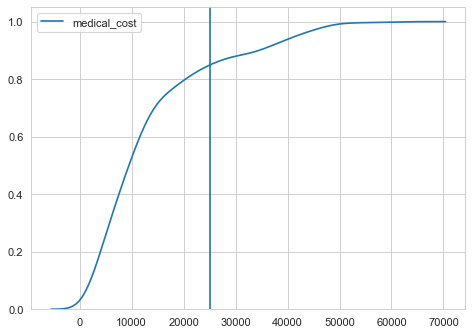

In [6]:
# import your code here
plt.figure(figsize = (7,5),dpi = 80)
sns.kdeplot(hi['medical_cost'], cumulative = True)
plt.axvline(25000)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The mean of BMI is :  31.581396153846132
The median of BMI is :  31.645
The skew of BMI is:  0.2496769760401315


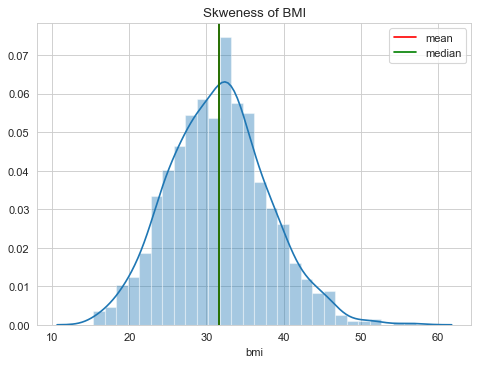

In [7]:
# import your code here
mean = hi['bmi'].mean()
median = hi['bmi'].median()
print('The mean of BMI is : ',mean)
print('The median of BMI is : ',median)
sk = hi['bmi'].skew()
print('The skew of BMI is: ',sk)
plt.figure(figsize = (7,5),dpi = 80)
sns.distplot(hi['bmi'])
plt.axvline(mean, label = 'mean', color = 'red')
plt.axvline(median, label = 'median', color = 'green')
plt.title('Skweness of BMI')
plt.legend()
plt.show()

From the above plot it is visible that BMI is a symetrical distribution


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

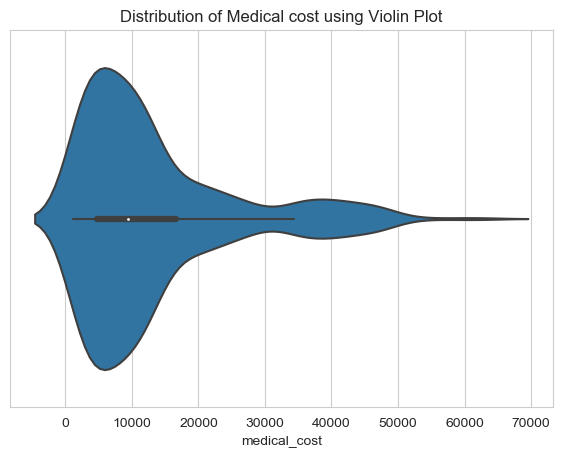

In [8]:
# import your code here
plt.figure(figsize = (7,5), dpi = 100)
sns.violinplot(hi['medical_cost'])
plt.title('Distribution of Medical cost using Violin Plot')
plt.show()

From the above Voilin Plot it is seen that Meical Cost is highly skewed toward the right having a lot of outlier towards the right

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

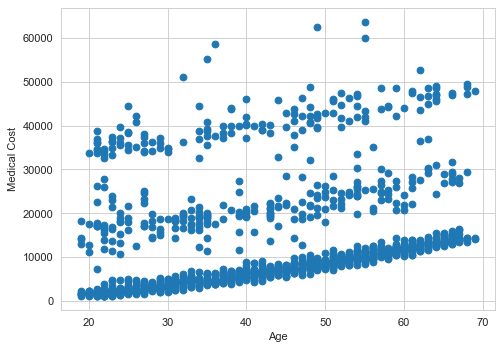

In [9]:
plt.figure(figsize = (7,5),dpi = 80)
plt.scatter(hi['age'],hi['medical_cost'])
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.show()

In [10]:
hi[(hi['age'] < 30) & (hi['medical_cost'] > 40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


From the above plot it is visible that there are people less than the age of 30 having medical cost more than 30k

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

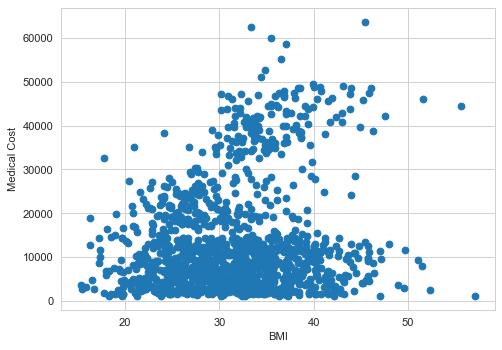

In [11]:
# import your code here
plt.figure(figsize = (7,5),dpi = 80)
plt.scatter(hi['bmi'],hi['medical_cost'])
plt.xlabel('BMI')
plt.ylabel('Medical Cost')
plt.show()

yes from the above scatter plot for BMI and Medical cost we see that there are outliers in the plot

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# import your code here
print('The below data shows the percentage of variation in BMI for both the genders')
(hi.groupby('gender')['bmi'].std() / hi.groupby('gender')['bmi'].mean()) * 100

The below data shows the percentage of variation in BMI for both the genders


gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# import your code here
u = pd.crosstab(hi['gender'],hi['region'])
u

region,northeast,northwest,southeast,southwest
gender,,,,
F,174,149,178,156
M,141,166,178,158


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

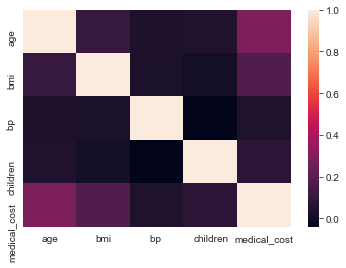

In [14]:
# import your code here
x= hi.corr()
sns.heatmap(x)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

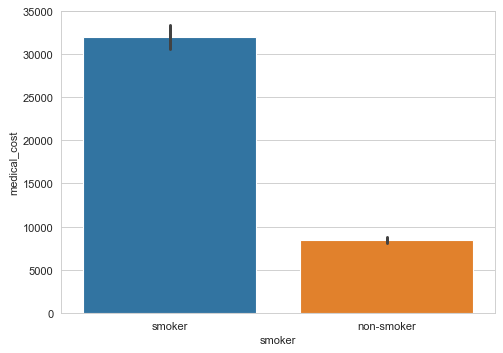

From the above plot it is visible that the people who smoke have a higher medical cost


In [15]:
# import your code here
plt.figure(figsize = (7,5), dpi = 80)
sns.barplot(x=hi['smoker'], y=hi['medical_cost'])
plt.show()
print('From the above plot it is visible that the people who smoke have a higher medical cost')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Figure size 1000x700 with 0 Axes>

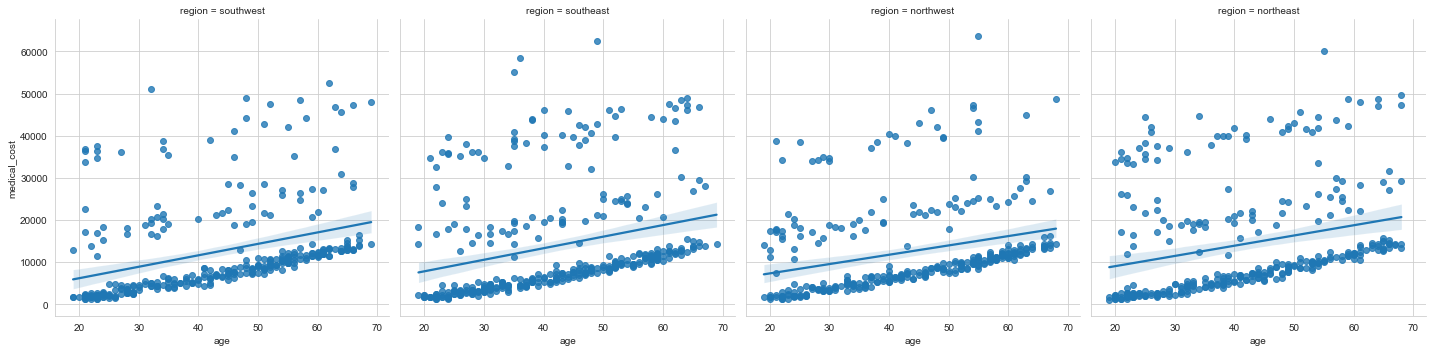

In [12]:
# import your code here
plt.figure(figsize = (10,7),dpi = 100)
sns.lmplot(x = 'age',y = 'medical_cost',data = hi, col = 'region')
plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# import your code here
pd.get_dummies(hi['region']).head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# import your code here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
hi['smoker_label'] = le.fit_transform(hi['smoker'])
hi.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,MMBMI,ZSBMI,LOGAGE,mmc,smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.396989,0.050142,3.135494,0.251611,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.513384,0.816583,2.995732,0.009636,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.471080,0.538020,3.496508,0.053115,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.201123,-1.239588,3.610918,0.333010,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.300908,-0.582526,3.583519,0.043816,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# import your code here
hi['fe gender'] = hi['gender'].map(hi['gender'].value_counts(normalize = True))
hi.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,MMBMI,ZSBMI,LOGAGE,mmc,smoker_label,fe gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.396989,0.050142,3.135494,0.251611,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.513384,0.816583,2.995732,0.009636,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.471080,0.538020,3.496508,0.053115,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.201123,-1.239588,3.610918,0.333010,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.300908,-0.582526,3.583519,0.043816,0,0.505385


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# import your code here
hi.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,MMBMI,ZSBMI,LOGAGE,mmc,smoker_label,fe gender
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.396989,0.050142,3.135494,0.251611,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.513384,0.816583,2.995732,0.009636,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.471080,0.538020,3.496508,0.053115,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.201123,-1.239588,3.610918,0.333010,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.300908,-0.582526,3.583519,0.043816,0,0.505385


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# import your code here
mm = MinMaxScaler()
print('The maean of BMI before Normalization is: ',hi['bmi'].mean())
print('The variance of BMI before Normalization is: ',hi['bmi'].var())
print('The mean of BMI after normalization using MinMaxScaler to get it as 0 is: ',mm.fit_transform(hi[['bmi']]).mean())
print('The mean of BMI after normalization using Zscore to get it as 1 is: ',zscore(hi['bmi']).var())
hi['MMBMI'] = mm.fit_transform(hi[['bmi']])
hi['ZSBMI'] = zscore(hi['bmi'])
hi.head()

The maean of BMI before Normalization is:  31.581396153846132
The variance of BMI before Normalization is:  40.40492851499686
The mean of BMI after normalization using MinMaxScaler to get it as 0 is:  0.3893737130460362
The mean of BMI after normalization using Zscore to get it as 1 is:  1.0000000000000002


,age,gender,bmi,bp,children,region,smoker,medical_cost,MMBMI,ZSBMI
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.396989,0.050142
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.513384,0.816583
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.471080,0.538020
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.201123,-1.239588
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.300908,-0.582526


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# import your code here
a = hi['age'].max()
b = hi['age'].min()
print('The range of age is : ',a - b)
c = np.log(hi['age'].max())
d = np.log(hi['age'].min())
print('The range of age after transformation will be : ', c - d)
hi['LOGAGE'] = np.log(hi['age'])
hi.head()

The range of age is :  50
The range of age after transformation will be :  1.2896675254308194


,age,gender,bmi,bp,children,region,smoker,medical_cost,MMBMI,ZSBMI,LOGAGE
0,23,M,31.900,157,0,southwest,smoker,16884.92400,0.396989,0.050142,3.135494
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0.513384,0.816583,2.995732
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0.471080,0.538020,3.496508
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0.201123,-1.239588,3.610918
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0.300908,-0.582526,3.583519


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# import your code here
hi['medical_cost'].skew()
hi['mmc'] = mm.fit_transform(hi[['medical_cost']])
hi['mmc'].skew()

1.5341854555059418

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [14]:
# import your code here
hi['log_medical_cost'] = np.log(hi['medical_cost'])

In [17]:
print("SKEWNESS")
print('medical cost: ',hi['medical_cost'].skew())
print('log medical cost: ',hi['log_medical_cost'].skew())
print("KURT")
print('medical cost: ',hi['medical_cost'].kurt())
print('log medical cost: ',hi['log_medical_cost'].kurt())
print("MEAN")
print('medical cost: ',hi['medical_cost'].mean())
print('log medical cost: ',hi['log_medical_cost'].mean())
print("MEDIAN")
print('medical cost: ',hi['log_medical_cost'].median())
print('log medical cost: ',hi['log_medical_cost'].median())
print("STANDARD DEVIATION")
print('medical cost: ',hi['log_medical_cost'].std())
print('log medical cost: ',hi['log_medical_cost'].std())

SKEWNESS
medical cost:  1.5341854555059413
log medical cost:  -0.09331493541417475
KURT
medical cost:  1.69050631655736
log medical cost:  -0.6152680602338227
MEAN
medical cost:  13243.214690660765
log medical cost:  9.100268505200694
MEDIAN
medical cost:  9.1472677936443
log medical cost:  9.1472677936443
STANDARD DEVIATION
medical cost:  0.9148304286020954
log medical cost:  0.9148304286020954
